In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = 'Data/Data Among Us.csv'

In [3]:
Us = pd.read_csv(path)

In [4]:
type(Us)

pandas.core.frame.DataFrame

In [5]:
Us.head()

,Timestamp,nickname,personality,favourite singer,simple pleasures,Relaxation is,food to eat tonight,favourite film type,favourite film,favourite line from film
0,17/10/2024 13:55:42,Olly,Extrovert,Charli XCX,Ironed clothes,Good Food,Ramen,Science Fiction/Fantasy,Parasite,no idea
1,17/10/2024 13:57:12,bei,Extrovert,Coldplay,Sunshine,Good Weather,Hotpot,Science Fiction/Fantasy,Coco,Touching
2,17/10/2024 13:58:22,Bami,Extrovert,Kadja Bonet,Scrambled eggs in the morning,Good Food,Hotpot,Action/Adventure,Gladiator,Are you not entertained?!
3,17/10/2024 13:58:29,NaN,Introvert,Taylor Swift,Sleeping,Good Weather,stir-fried rice,Animated,La La Land,NaN
4,17/10/2024 13:59:30,cccc,Introvert,Oli Sykes,"Cats, Food, Gaming, Skateboarding, Guitar",Good Game,Pizza,Horror,10 Things I Hate About You,idk </3


In [6]:
Us.columns

Index(['Timestamp', 'nickname', 'personality', 'favourite singer',
       'simple pleasures', 'Relaxation is', 'food to eat tonight',
       'favourite film type', 'favourite film', 'favourite line from film'],
      dtype='object')

In [7]:
Us.nickname

0            Olly
1             bei
2            Bami
3             NaN
4            cccc
5            Puqu
6           sizzy
7           Proud
8     Sonic Fawny
9           Zaidy
10         fergie
11           Kiya
12         Hommie
13            NaN
14         pikapi
15           Mona
16            NaN
Name: nickname, dtype: object

In [10]:
# DataFrame
nickname_df =  pd.DataFrame(Us.nickname)
# Find the longest nickname
longest_nickname = nickname_df['nickname'].loc[nickname_df['nickname'].str.len().idxmax()]
print("Longest nickname:", longest_nickname)

Longest nickname: Sonic Fawny


In [12]:
# Count the number of NaN values
# Total number of entries
total_count = len(nickname_df['nickname']) 
# Count of non-NaN entries
non_nan_count = nickname_df['nickname'].count() 
# Calculate NaN count
nan_count = total_count - non_nan_count
print("Number of NaN values:", nan_count)

Number of NaN values: 3


In [13]:
# value_counts() is for counting the unique values in a Series and return a Series containing counts of unique values
# Used primarily for categorical data
# counts() is for counting the
personality_df = pd.DataFrame(Us.personality)
personality_counts = personality_df['personality'].value_counts()
print(personality_counts)

personality
Introvert    10
Extrovert     7
Name: count, dtype: int64


In [14]:
# When there is a space in the colume words, use the [] square brackets and quotes
Us['favourite singer']

0        Charli XCX
1          Coldplay
2       Kadja Bonet
3      Taylor Swift
4         Oli Sykes
5        Portishead
6               NaN
7     Baby No Money
8         Bad Bunny
9           FINNEAS
10           sampha
11         Maroon 5
12         Coldplay
13         Coldplay
14         Jay Chou
15     Taylor Swift
16     Taylor Swift
Name: favourite singer, dtype: object

In [15]:
lovesingers_df = pd.DataFrame(Us['favourite singer'])

In [26]:
# Filter for Introverts
introverts = lovesingers_df[personality_df['personality'] == 'Introvert']['favourite singer']
introvert_singers_unique = introverts.dropna().drop_duplicates().reset_index(drop=True)

print("\nFavorite singers of Introvert people:")
print(introvert_singers_unique)

# Filter for Extroverts
extroverts = lovesingers_df[personality_df['personality'] == 'Extrovert']['favourite singer']
extrovert_singers_unique = extroverts.dropna().drop_duplicates().reset_index(drop=True)

print("Favorite singers of Extrovert people:")
print(extrovert_singers_unique)


Favorite singers of Introvert people:
0     Taylor Swift
1        Oli Sykes
2       Portishead
3    Baby No Money
4          FINNEAS
5         Maroon 5
6         Coldplay
7         Jay Chou
Name: favourite singer, dtype: object
Favorite singers of Extrovert people:
0      Charli XCX
1        Coldplay
2     Kadja Bonet
3       Bad Bunny
4          sampha
5    Taylor Swift
Name: favourite singer, dtype: object


In [27]:
# Count occurrences of each singer for all data
most_popular_singer = lovesingers_df['favourite singer'].value_counts().idxmax()

# Get the most popular singer for Introverts
introvert_singers = lovesingers_df[personality_df['personality'] == 'Introvert']
introvert_most_popular = introvert_singers['favourite singer'].dropna().value_counts().idxmax()
print(f"I LOVE {introvert_most_popular.upper()} !!!(Introvert)")

# Get the most popular singer for Extroverts
extrovert_singers = lovesingers_df[personality_df['personality'] == 'Extrovert']
extrovert_most_popular = extrovert_singers['favourite singer'].dropna().value_counts().idxmax()
print(f"I LOVE {extrovert_most_popular.upper()} !!!(Extrovert)")

I LOVE TAYLOR SWIFT !!!(Introvert)
I LOVE COLDPLAY !!!(Extrovert)


In [28]:
# Iterating through each row
for index, row in Us.iterrows():
    print(f" I really need {row['simple pleasures']} and {row['Relaxation is']}.")

 I really need Ironed clothes and Good Food.
 I really need Sunshine and Good Weather.
 I really need Scrambled eggs in the morning and Good Food.
 I really need Sleeping and Good Weather.
 I really need Cats, Food, Gaming, Skateboarding, Guitar and Good Game.
 I really need Long walks and A Good Movie.
 I really need chilling and Good Food.
 I really need Bake bread and Good Food.
 I really need TV! and Good Weather.
 I really need Annoying my sister and Good Food.
 I really need things made of oak and Good Game.
 I really need eat chips and Good Food.
 I really need Read,  Sleep, making UI and Good Weather.
 I really need art and Good Food.
 I really need beer and Good Game.
 I really need Sun and Good Weather.
 I really need cake and Good Food.


In [29]:
food_df = pd.DataFrame(Us['food to eat tonight'])
food_counts = food_df['food to eat tonight'].value_counts()

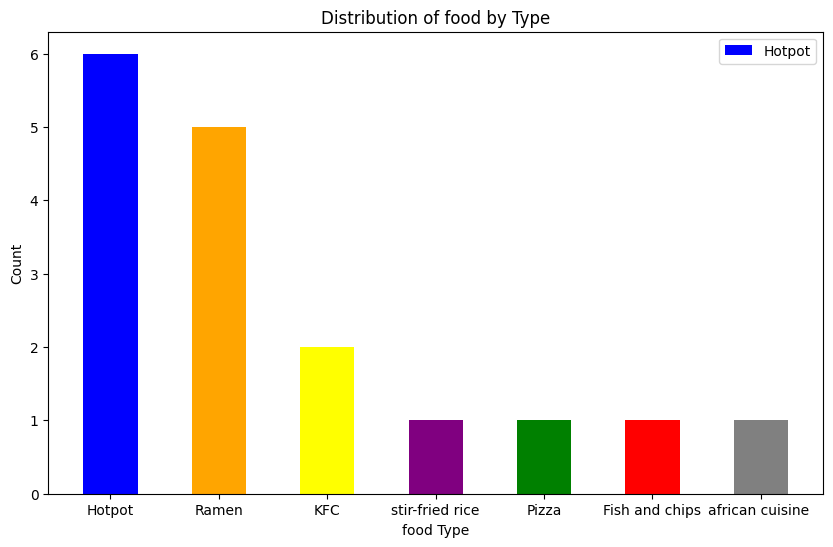

In [30]:
# Create a bar plot
plt.figure(figsize=(10, 6)) 
plt.bar(food_counts.index, food_counts.values,width=0.5,color=['blue', 'orange','yellow','purple', 'green','red','grey'])
plt.title("Distribution of food by Type")
plt.xlabel("food Type")
plt.ylabel("Count")
plt.legend(['Hotpot', 'Ramen','KFC','stir-fried rice','Pizza','Fish and chips','african cuisine'])
plt.show()

In [31]:
film_df = pd.DataFrame(Us['favourite film type'])
film_counts = film_df['favourite film type'].value_counts()
print(film_counts)

favourite film type
Science Fiction/Fantasy    6
Comedy                     4
Action/Adventure           3
Animated                   2
Horror                     2
Name: count, dtype: int64


In [36]:
for index, row in Us.iterrows():
    line = row['favourite line from film']
# To avoid the responses of idk, check word in the line has more than 6 letters
    if any(len(word) > 6 for word in str(line).split()):
# To avoid the line already has quotes
        if not (line.startswith('"') and line.endswith('"')):
            line = f'"{line}"'
        print(f"Best line from {row['favourite film']} said: {line}.")

Best line from Coco said: "Touching".
Best line from Gladiator said: "Are you not entertained?!".
Best line from Howl's Moving Castle said: " A heart is a heavy burden".
Best line from Minions said: "BANNAAAANNANANANANNA".
Best line from Spirited Away said: "HAKUUUUUUUUUUUU!!!!!!!".
Best line from The Dark Knight said: "That doesn't kill you makes you..... STRANGER".
Best line from LOTR said: "po-ta-to, boil em mash em stick em in a stew".
Best line from Everything everywhere all at once said: "You are not unlovable.".
Best line from Druk said: "need 0.05 alcohol".
Best line from The Dark Knight said: "Hope is a good thing, maybe the best of things, and no good thing ever dies.".
